### Transfer Learning on Human vs Horse Dataset

In [13]:
#importing libraries
from PIL import Image

import os, random
import matplotlib.pyplot as plt
import tensorflow as tf

#### Dataset

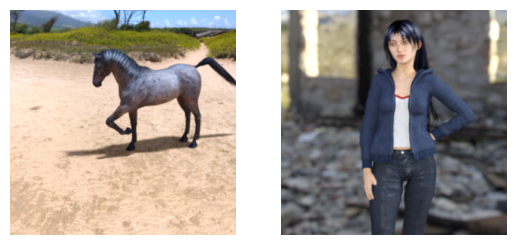

In [14]:
train_dir = "D:\\Tensorflow_Works\\5-Exploring_Larger_Dataset\\horse-or-human"
validation_dir = "D:\\Tensorflow_Works\\5-Exploring_Larger_Dataset\\validation-horse-or-human"

#directories for each class
train_horse_dir = os.path.join(train_dir, "horses")
train_human_dir = os.path.join(train_dir, "humans")

#load the first example of each one the classes
train_horse_files = os.listdir(train_horse_dir)
train_human_files = os.listdir(train_human_dir)

plt.subplot(1,2,1)
random_horseimg_path = os.path.join(train_horse_dir, random.choice(train_horse_files))
img = Image.open(random_horseimg_path)
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
random_humanimg_path = os.path.join(train_human_dir, random.choice(train_human_files))
img = Image.open(random_humanimg_path)
plt.imshow(img)
plt.axis("off")

plt.show()

In [15]:
#preparing training and validation datasets

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(300, 300),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(300, 300),
    batch_size=32,
    label_mode="binary"
)



Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [16]:
#preparing base model from inception v3
loaded_weight_file = "D:\\Tensorflow_Works\\6-Transfer_Learning\\model\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape=(300, 300, 3),
    include_top=False,
    weights=None
)

pre_trained_model.load_weights(loaded_weight_file)

for layer in pre_trained_model.layers:
    layer.trainable=False


pre_trained_model.summary()    

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [17]:
#let's take layer "mixed6" as last layer from pretrained model

last_layer = pre_trained_model.get_layer("mixed6")
last_layer_output_shape = print(f"mixed6 layer output shape: {last_layer.output.shape}")
pre_trained_model_output = last_layer.output

mixed6 layer output shape: (None, 17, 17, 768)


In [18]:
#appending it to our custom model

x = tf.keras.layers.Flatten()(pre_trained_model_output)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 234,112,289 (893.07 MB)

 Trainable params: 227,280,897 (867.01 MB)

 Non-trainable params: 6,831,392 (26.06 MB)

In [19]:
#preprocessing the dataset for inception v3

def preprocessing(image, label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

train_dataset_scaled = train_dataset.map(preprocessing)
validation_dataset_scaled = validation_dataset.map(preprocessing)


In [20]:
#optimizing traininig and validation datasets

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(1000)
                       .prefetch(tf.data.AUTOTUNE))

validation_dataset_final = (validation_dataset_scaled
                       .cache()
                       .prefetch(tf.data.AUTOTUNE))


In [ ]:
#a sequential model for augmentation 

aug_model = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal", fill_mode="nearest"),
    tf.keras.layers.RandomRotation(0.2, fill_mode="nearest"),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomCrop(0.4, fill_mode="nearest"),
    tf.keras.layers.RandomTranslation(0.2, 0.2)
])

In [ ]:
#appending model with aug model

layer_inputs = tf.keras.Input(shape=(300,300,3))
x = aug_model(layer_inputs)
x = model(x)

model_with_aug = tf.keras.Model(inputs=layer_inputs)